<a href="https://colab.research.google.com/github/amarsansil/projects/blob/main/crop_yeild_NIOA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats

In [ ]:
df = pd.read_excel("crop yield data sheet.xlsx")


In [ ]:
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


In [ ]:
#Checking the shape of the dataset
df.shape

(109, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperatue      100 non-null    object 
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 6.1+ KB


In [ ]:
df.isnull().sum()

Rain Fall (mm)    10
Fertilizer        10
Temperatue         9
Nitrogen (N)      10
Phosphorus (P)    10
Potassium (K)     10
Yeild (Q/acre)    10
dtype: int64

In [ ]:
df.duplicated().sum()

12

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
#Checking the data types of the columns
df.dtypes

Rain Fall (mm)    float64
Fertilizer        float64
Temperatue         object
Nitrogen (N)      float64
Phosphorus (P)    float64
Potassium (K)     float64
Yeild (Q/acre)    float64
dtype: object

In [ ]:
df['Temperatue'].unique()

array([28, 36, 29, 35, 27, 34, 37, 39, 26, 38, 24, 25, 40, nan, ':'],
      dtype=object)

In [ ]:
#Dropping ":" from the Temperatue column
df = df[df['Temperatue'] != ':']

In [ ]:
#converting the Temperatue column to float
df['Temperatue'] = df['Temperatue'].astype(float)

In [ ]:
#Checking for null values
df.isnull().sum()

Rain Fall (mm)    1
Fertilizer        1
Temperatue        1
Nitrogen (N)      1
Phosphorus (P)    1
Potassium (K)     1
Yeild (Q/acre)    1
dtype: int64

In [ ]:
#replacing missing values with median
columns = [df.columns]
for col in columns:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
df.describe()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,844.479167,67.625000,32.479167,70.604167,21.041667,18.041667,8.989583
std,397.953633,9.909326,5.432803,6.539723,1.913479,1.811755,1.927610
min,400.000000,50.000000,24.000000,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,28.000000,65.000000,19.000000,16.000000,7.000000
50%,1150.000000,70.000000,29.000000,70.000000,21.000000,19.000000,9.000000
75%,1226.250000,77.000000,38.000000,77.000000,23.000000,19.000000,11.000000
max,1300.000000,80.000000,40.000000,80.000000,25.000000,22.000000,12.000000


In [ ]:
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28.0,80.0,24.0,20.0,12.0
1,480.0,60.0,36.0,70.0,20.0,18.0,8.0
2,1250.0,75.0,29.0,78.0,22.0,19.0,11.0
3,450.0,65.0,35.0,70.0,19.0,18.0,9.0
4,1200.0,80.0,27.0,79.0,22.0,19.0,11.0


In [ ]:
len(df['Yeild (Q/acre)'].unique())

13

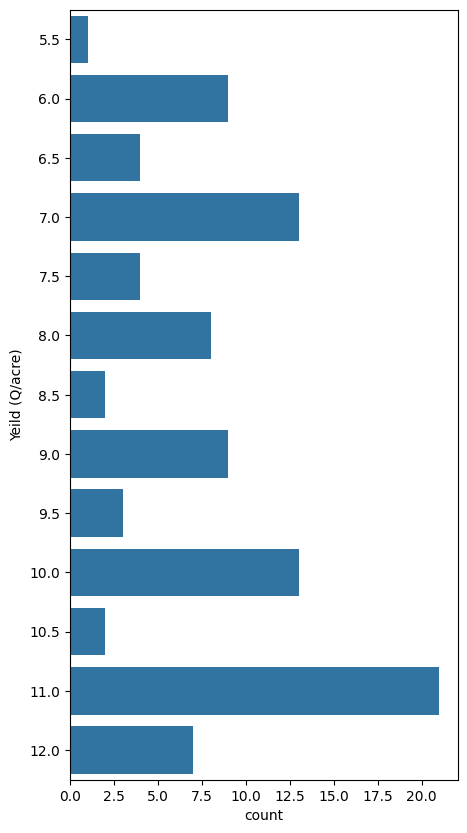

In [ ]:
plt.figure(figsize=(5,10))
sns.countplot(y=df['Yeild (Q/acre)'])
plt.show()

In [ ]:
(df['Yeild (Q/acre)'].value_counts() < 500).sum()

13

<Axes: xlabel='Rain Fall (mm)', ylabel='Count'>

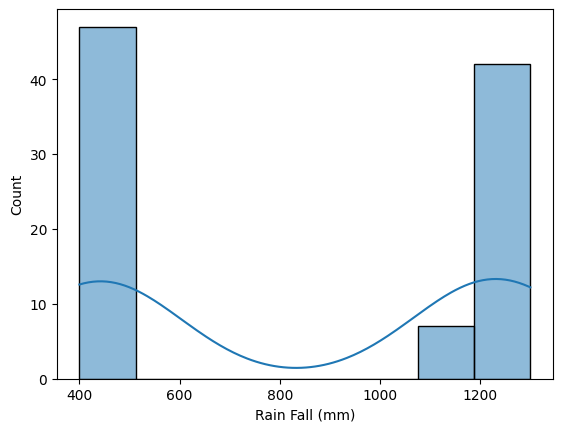

In [ ]:
sns.histplot(x = "Rain Fall (mm)", data = df, kde = True)

<Axes: xlabel='Fertilizer', ylabel='Count'>

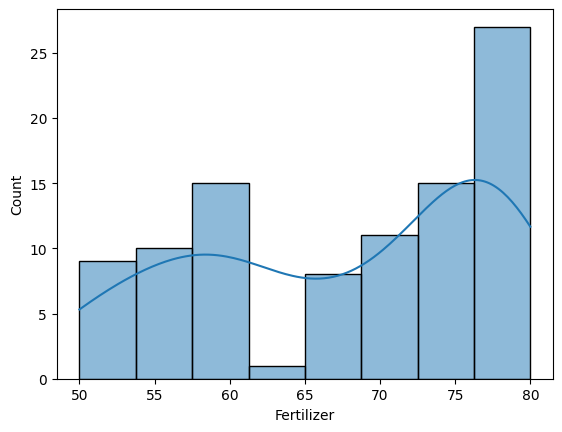

In [ ]:
sns.histplot(x = "Fertilizer", data = df, kde = True)

<Axes: xlabel='Temperatue', ylabel='Count'>

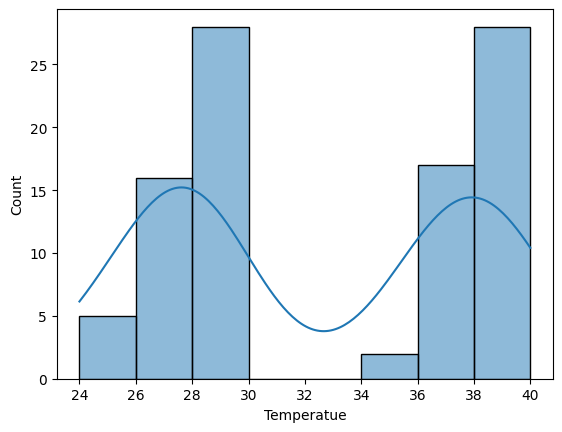

In [ ]:
sns.histplot(x="Temperatue", data = df, kde = True)

<Axes: xlabel='Potassium (K)', ylabel='Count'>

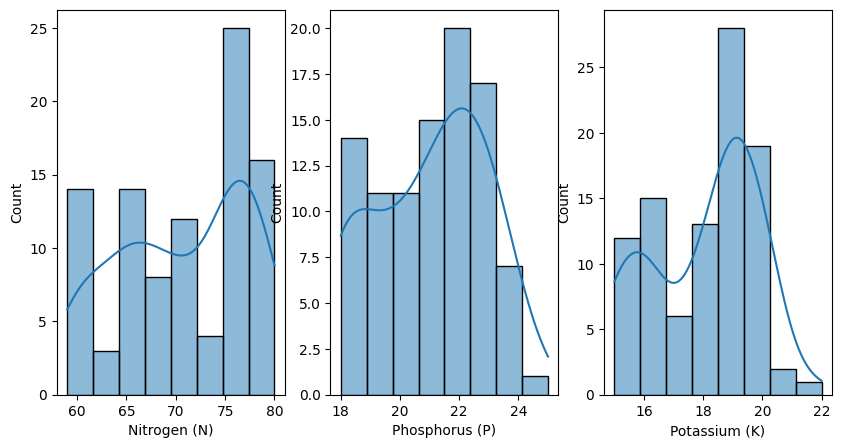

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(10, 5))
sns.histplot(x = "Nitrogen (N)", data = df, kde = True, ax = ax[0])
sns.histplot(x = "Phosphorus (P)", data = df, kde = True, ax = ax[1])
sns.histplot(x = "Potassium (K)", data = df, kde = True, ax = ax[2])

<Axes: xlabel='Yeild (Q/acre)', ylabel='Count'>

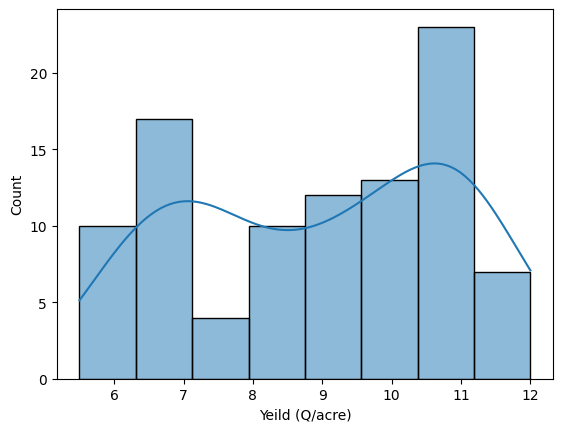

In [ ]:
sns.histplot(x = "Yeild (Q/acre)", data = df, kde = True)


<Axes: xlabel='Rain Fall (mm)', ylabel='Yeild (Q/acre)'>

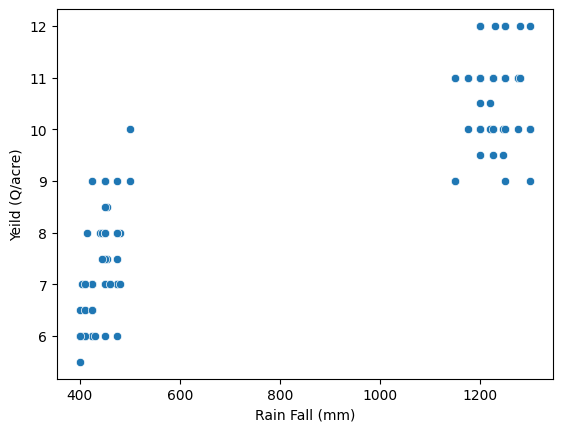

In [ ]:
sns.scatterplot(x = 'Rain Fall (mm)', y = 'Yeild (Q/acre)', data = df)

<Axes: xlabel='Fertilizer', ylabel='Yeild (Q/acre)'>

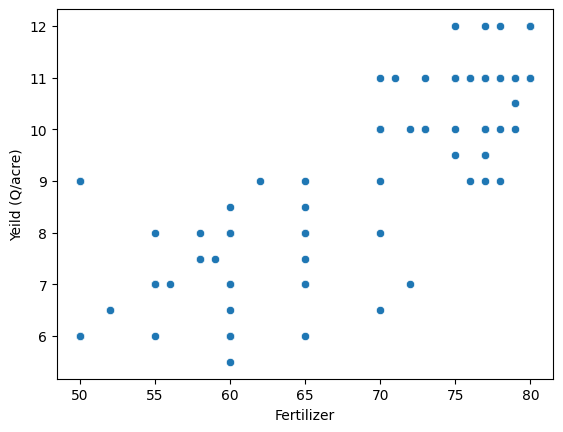

In [ ]:
sns.scatterplot(x = 'Fertilizer', y = 'Yeild (Q/acre)', data = df)

<Axes: xlabel='Temperatue', ylabel='Yeild (Q/acre)'>

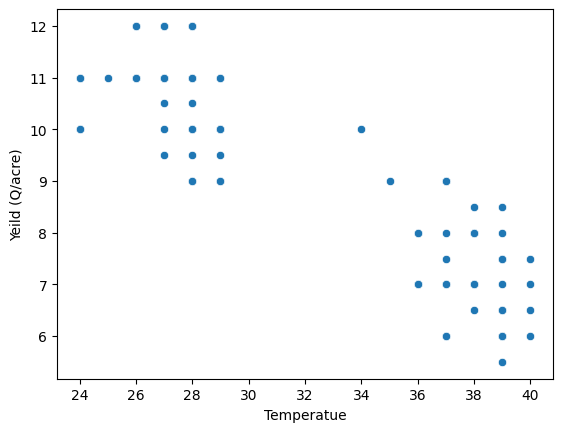

In [ ]:

sns.scatterplot(x = 'Temperatue', y = 'Yeild (Q/acre)', data = df)

<Axes: xlabel='Potassium (K)', ylabel='Yeild (Q/acre)'>

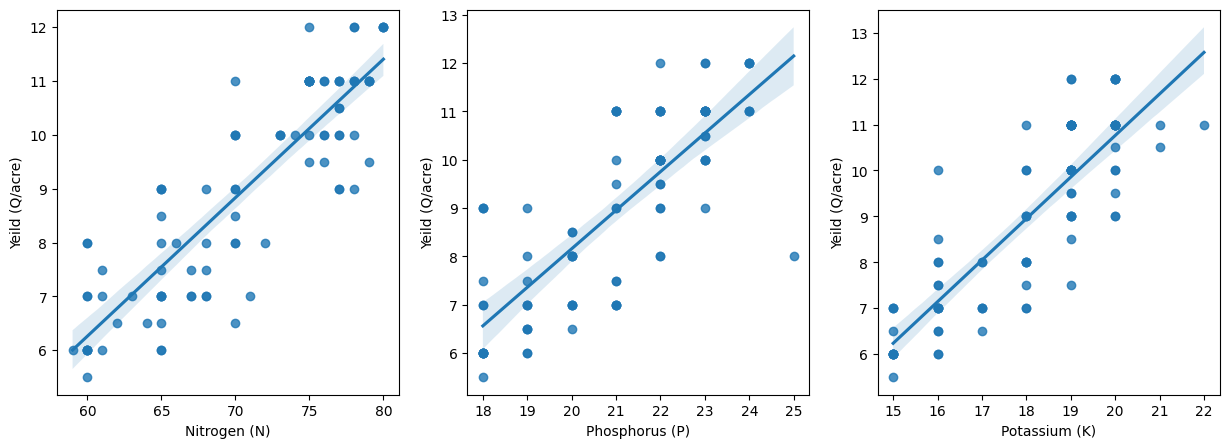

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15, 5))
sns.regplot(x = 'Nitrogen (N)', y = 'Yeild (Q/acre)', data = df, ax = ax[0])
sns.regplot(x = 'Phosphorus (P)', y = 'Yeild (Q/acre)', data = df, ax = ax[1])
sns.regplot(x = 'Potassium (K)', y = 'Yeild (Q/acre)', data = df, ax = ax[2])

In [ ]:
z_scores = np.abs(stats.zscore(df["Phosphorus (P)"]))
z_scores = np.abs(stats.zscore(df["Nitrogen (N)"]))
z_scores = np.abs(stats.zscore(df["Potassium (K)"]))
outliers = df[z_scores > 3]
cleaned_data = df.drop(outliers.index)

<Axes: >

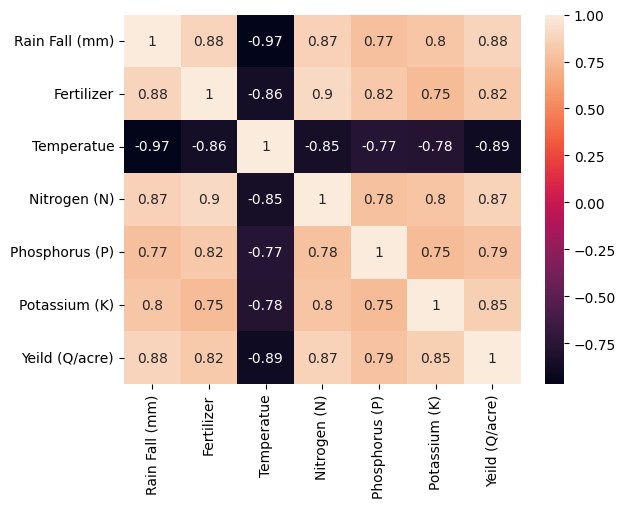

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

In [ ]:
df.head(3)

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28.0,80.0,24.0,20.0,12.0
1,480.0,60.0,36.0,70.0,20.0,18.0,8.0
2,1250.0,75.0,29.0,78.0,22.0,19.0,11.0


In [ ]:
h = pd.DataFrame({'Yeild (Q/acre)': [12.0]})
j = pd.Series([12.0], name='Yeild (Q/acre)')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.optimize import differential_evolution

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
def differential_evolution(model, X_train, y_train, X_val, y_val, bounds, F=0.5, CR=0.9, popsize=20, max_iter=100):

  # Ensure data is in pandas DataFrames and Series
  if not isinstance(X_train, pd.DataFrame):
      X_train = pd.DataFrame(X_train)
  if not isinstance(y_train, pd.Series):
      y_train = pd.Series(y_train)
  if not isinstance(X_val, pd.DataFrame):
      X_val = pd.DataFrame(X_val)
  if not isinstance(y_val, pd.Series):
      y_val = pd.Series(y_val)

  # Fitness function
  def fitness(params):
      # Unpack hyperparameters from array into a dictionary
      params_dict = dict(zip(bounds.T[0], params))  # Assuming bounds is a 2D array with hyperparameter names in the first column

      model.set_params(**params_dict)  # Set hyperparameters on the model using the dictionary
      model.fit(X_train, y_train)  # Train the model
      return -model.score(X_val, y_val)  # Minimize negative evaluation metric (e.g., mean squared error)

  # Main loop
  population = np.random.rand(popsize, len(bounds)) * (bounds[:, 1] - bounds[:, 0]) + bounds[:, 0]
  for iter in range(max_iter):
      for i in range(popsize):
          # Differential mutation
          a, b, c = np.random.choice(popsize, size=3, replace=False)
          mutant = population[a] + F * (population[b] - population[c])

          # Crossover
          trial = np.copy(population[i])
          crossover_points = np.random.rand(len(bounds)) < CR
          trial[crossover_points] = mutant[crossover_points]

          # Bounds handling
          trial = np.clip(trial, bounds[:, 0], bounds[:, 1])

          # Selection
          if fitness(trial) < fitness(population[i]):
              population[i] = trial

      # Update best solution
      best_index = np.argmin(fitness(population))
      best_params = population[best_index]

  # Return best model and parameters
  model.set_params(params)
  model.fit(X_train, y_train)
  return model, params

# Ensure your data is in pandas DataFrames and Series
X_train = pd.DataFrame({'Yield (Q/acre)': [12.0]})  # Training features
y_train = pd.Series([12.0], name='Yield (Q/acre)')  # Training labels (crop yield)
X_val = pd.DataFrame({'Yield (Q/acre)': [8.0]})  # Validation features
y_val = pd.Series([8.0], name='Yield (Q/acre)')  # Validation labels (crop yield)

In [ ]:
print(df.columns)

Index(['Rain Fall (mm)', 'Fertilizer', 'Temperatue', 'Nitrogen (N)',
       'Phosphorus (P)', 'Potassium (K)', 'Yeild (Q/acre)'],
      dtype='object')


In [ ]:
#Nature optimized algorithm starts from here:
import random
# Define a class to represent a solution
class Solution:
  def __init__(self, Fertilizer):
    self.Fertilizer = Fertilizer

  # Function to evaluate the solution
  def fitness(self):
    return random.uniform(0, 1)

In [ ]:
# Defining genetic function
def roulette_wheel_selection(Fertilizer):

  # Calculate total fitness
  total_fitness = sum(individual.fitness() for individual in Fertilizer)

  # Assign selection probabilities
  probabilities = [individual.fitness() / total_fitness for individual in Fertilizer]

  # Spin the roulette wheel (random selection based on probabilities)
  parent1_index = np.random.choice(len(Fertilizer), p=probabilities)
  parent2_index = np.random.choice(len(Fertilizer), p=probabilities)

  # Return selected parents
  return Fertilizer[0], Fertilizer[1]


In [ ]:
def crossover(parent1, parent2):
  # Implement a crossover strategy to create offspring
  # Combine genes from parents to create new solutions
  crossover_point = random.randint(1, len(parent1.genes) - 1)
  offspring1 = Solution(parent1.genes[:crossover_point] + parent2.genes[crossover_point:])
  offspring2 = Solution(parent2.genes[:crossover_point] + parent1.genes[crossover_point:])
  return offspring1, offspring2

In [ ]:

def mutation(solution):
  # Implement a mutation strategy
  for i in range(len(solution.genes)):
    if random.random() < mutation_rate:
      solution.genes[i] = random.uniform(min_value, max_value)
  return solution


In [ ]:
def selection(population):
  # Placeholder selection function
  parent1 = random.choice(population)
  parent2 = random.choice(population)
  return parent1, parent2

# Main loop for GA iterations
num_generations = 100
for generation in range(num_generations):
  # Selection
  pop_size = 100
  num_genes = len(X_train.columns)
  population = [Solution([random.uniform(0, 1) for _ in range(num_genes)]) for _ in range(pop_size)]

  parents = selection(population)



In [ ]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.4 MB/s eta 0:00:00


In [ ]:
from deap import base, creator, tools, algorithms
import random

In [ ]:
creator.create("Solution", base.Fitness, weights=(1.0,))


In [ ]:
creator.Solution.genes = list


In [ ]:

# Evaluate fitness of the new generation
next_generation = []
for individual in next_generation:
  individual.fitness()  # Call the fitness method to calculate and assign the score



In [ ]:
from deap import base

class SimpleFitness(base.Fitness):
    def __init__(self):
        super().__init__()
        self.values = (0.0,)  # Initialize with a single value (replace with actual score calculation)


In [ ]:
from deap import creator

creator.create("Fitness", SimpleFitness)
creator.create("Individual", list, fitness=creator.Fitness)


In [ ]:
from deap import base, creator

# Define a custom fitness class without weights
class SimpleFitness(base.Fitness):
  def __init__(self):
    super().__init__()
    self.values = (0.0,)  # Initialize with a single value (replace with actual score calculation)

# Register fitness and individual classes
creator.create("Fitness", SimpleFitness)
creator.create("Individual", list, fitness=creator.Fitness)

# ... (rest of your GA implementation)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
from deap import tools

In [ ]:
!pip install stats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stats: filename=stats-0.1.2a0-py3-none-any.whl size=24283 sha256=a614f7e8be73861df4c836cb849fb1782b8375ee1acad61de4d0d2441f18b532
  Stored in directory: /root/.cache/pip/wheels/c9/85/bc/3371b9bce1e4f7b8b638e8c968a4dbd74db171ee180c48f808
Successfully built stats


In [ ]:
def evaluate_fitness(mean_absolute_error):
  return random.random()

In [ ]:
for individual in next_generation:
  individual.fitness.values = evaluate_fitness(individual)

In [ ]:
# GA parameters
population_size = 100
num_generations = 50
mutation_rate = 0.01
min_value = 0
max_value = 10
num_parameters

# Define the fitness evaluation function
def evaluate_fitness(individual):
  pass

# Create the toolbox
toolbox = base.Toolbox()

# Register the solution type
creator.create("Solution", base.Fitness, weights=(1.0,))

# Register the genetic operators
toolbox.register("mate", tools.cxUniform, indpb=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)



/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Solution' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop('Yeild (Q/acre)', axis=1)  # Training features
y = df['Yeild (Q/acre)']  # Training labels

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


In [ ]:
print(df.columns)

Index(['Rain Fall (mm)', 'Fertilizer', 'Temperatue', 'Nitrogen (N)',
       'Phosphorus (P)', 'Potassium (K)', 'Yeild (Q/acre)'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

if 'Yeild (Q/acre)' in df.columns:
    X = df.drop('Yeild (Q/acre)', axis=1)
    y = df['Yeild (Q/acre)']
else:
    print("Error: Column 'Yield (Q/acre)' not found in data. Check spelling and case sensitivity.")
    # Handle missing column

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)



**Model Building**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [ ]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [ ]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Rain Fall (mm)', 'StandardScale__Fertilizer',
       'StandardScale__Temperatue', 'StandardScale__Nitrogen (N)',
       'OHE__Phosphorus (P)_19.0', 'OHE__Phosphorus (P)_20.0',
       'OHE__Phosphorus (P)_21.0', 'OHE__Phosphorus (P)_22.0',
       'OHE__Phosphorus (P)_23.0', 'OHE__Phosphorus (P)_24.0',
       'OHE__Phosphorus (P)_25.0', 'OHE__Potassium (K)_16.0',
       'OHE__Potassium (K)_17.0', 'OHE__Potassium (K)_18.0',
       'OHE__Potassium (K)_19.0', 'OHE__Potassium (K)_20.0',
       'OHE__Potassium (K)_21.0', 'OHE__Potassium (K)_22.0'], dtype=object)

In [ ]:

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor(),
    'Rfr':RandomForestRegressor()
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)

    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)}, mse: {mean_squared_error(y_test, y_pred)} score : {r2_score(y_test,y_pred)}" )

lr : mae : 0.5295970831398874, mse: 0.44076663508567027 score : 0.8623679515735612
lss : mae : 1.081845446456444, mse: 1.6290005644962033 score : 0.49133471834622855
Rid : mae : 0.5852767491225064, mse: 0.5164380933689339 score : 0.8387390809152432
Dtr : mae : 0.1375, mse: 0.165625 score : 0.9482825917252147
Rfr : mae : 0.3644083333333333, mse: 0.23653972013888894 score : 0.9261390413305577


In [ ]:
dtr = DecisionTreeRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    "max_depth": [2,4,6,8],
    "min_samples_split": [2,4,6,8],
    "min_samples_leaf": [2,4,6,8],
    "random_state": [0,42]
}

#Grid search object
grid = GridSearchCV(dtr, para, cv = 5, n_jobs = -1, verbose = 1)

#fitting the grid search object
grid.fit(X_train_dummy, X_train_dummy)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth = 8, min_samples_leaf = 1, min_samples_split = 2, random_state = 0)
#fitting the model
dtr.fit(X_train_dummy, X_train_dummy)

#training score
print(dtr.score(X_train_dummy, X_train_dummy))


d_pred = dtr.predict(X_test_dummy)

0.9999684704915968


In [ ]:
from sklearn.ensemble import RandomForestRegressor

#Random Forest Regressor object
rfr = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    "n_estimators": [100,200,300],
    "max_depth": [2,4,6,8],
    "min_samples_split": [2,4,6,8],
    "min_samples_leaf": [2,4,6,8],
    "random_state": [0,42]
}

#Grid search object
grid = GridSearchCV(rfr, para, cv = 5, n_jobs = -1, verbose = 1)

#fitting the grid search object
grid.fit(X_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 0}


In [ ]:
#Random Forest Regressor with best parameters
rfr = RandomForestRegressor(max_depth = 8, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100, random_state = 0)

#fitting the model
rfr.fit(X_train, y_train)

#training score
print(rfr.score(X_train, y_train))

#prediction
r_pred = rfr.predict(X_test)

0.9758341928937918


<Axes: title={'center': 'Random Forest Regressor'}, xlabel='Yeild (Q/acre)', ylabel='Count'>

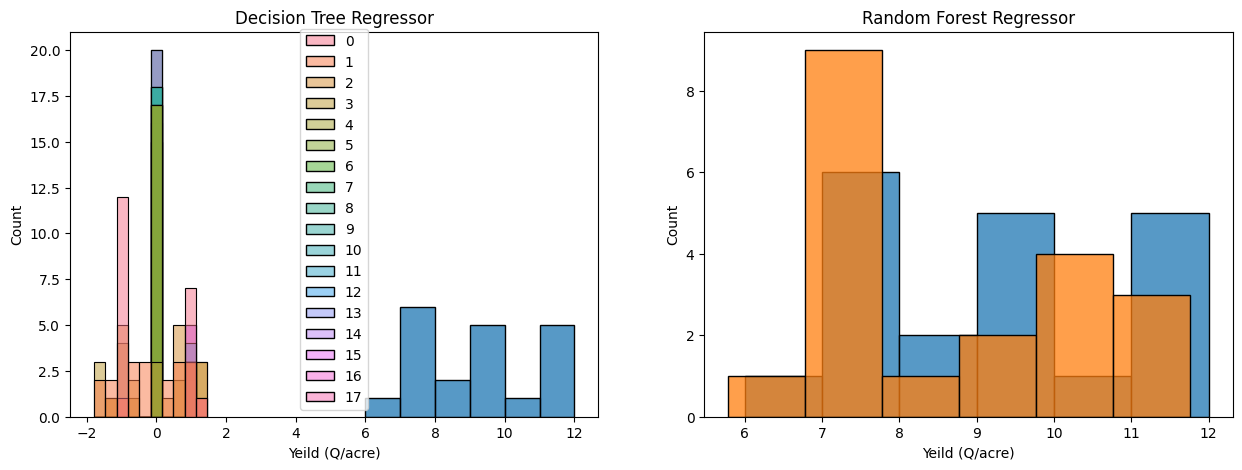

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))

#plotting the actual vs predicted values for decision tree regressor
sns.histplot(y_test, ax = ax[0]).set_title('Decision Tree Regressor')
sns.histplot(d_pred, ax = ax[0])

#plotting the actual vs predicted values for random forest regressor
sns.histplot(y_test, ax = ax[1]).set_title('Random Forest Regressor')
sns.histplot(r_pred, ax = ax[1])
